# Pneumonia labelization

This notebook will work on given dataset and try to retreive class properly previously adapted data

**Main goals are**: 

    - Put labels above images
    - Prepare data so it is easier to read (separated csv)

In [43]:
# Value determined in dataPreprocessing.ipynb
common_width = 1700
common_height = 1350
# Test purpose to limit execution time
max_iter = 600

In [44]:
import os
import pandas as pd
import numpy as np
import random

dfs_folder = "../../datasets/chest_Xray/_processed_resize/_processed_dfs"

dfs_files = [f for f in os.listdir(dfs_folder) if os.path.isfile(os.path.join(dfs_folder, f))]

# This prevent getting only normal data due to alphabetical order
random.shuffle(dfs_files)

dataset = pd.DataFrame(columns=['pixel_value', 'class'])  # Initialize an empty DataFrame with columns

for df_file in dfs_files[:max_iter]:
    df = pd.read_csv(os.path.join(dfs_folder, df_file))
    found_class = 0
    if "bacteria" in df_file:
        found_class = 2
    elif "virus" in df_file:
        found_class = 1
    else:
        found_class = 0

    pixel_values = df.values.flatten()
    new_row = {'pixel_value': [pixel_values], 'class': found_class}
    dataset = pd.concat([dataset, pd.DataFrame(new_row)], ignore_index=True)


In [45]:
dataset.iloc[1]

,pixel_value,class
0,"[72, 72, 72, 73, 73, 73, 72, 72, 71, 70, 70, 7...",2
1,"[9, 9, 9, 10, 11, 13, 14, 16, 17, 18, 15, 13, ...",1
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2
3,"[3, 49, 45, 46, 44, 44, 45, 45, 45, 45, 46, 48...",0
4,"[2, 12, 17, 19, 28, 0, 108, 255, 255, 255, 255...",0
...,...,...
595,"[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 3...",1
596,"[21, 24, 29, 34, 38, 40, 40, 38, 37, 37, 39, 4...",2
597,"[161, 157, 145, 142, 140, 137, 137, 136, 137, ...",0
598,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0


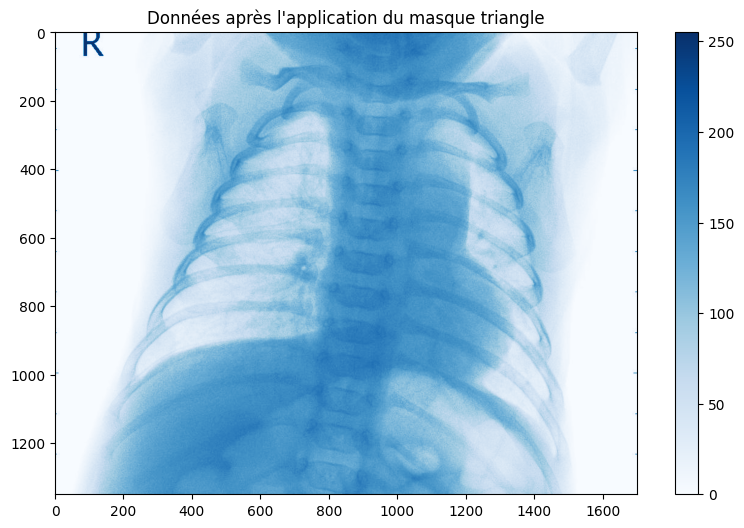

In [42]:
import matplotlib.pyplot as plt

test = dataset.iloc[1]["pixel_value"].reshape(common_height, common_width)

plt.figure(figsize=(10, 6))
plt.imshow(test, cmap='Blues')
plt.colorbar()
plt.title('Données après l\'application du masque triangle')
plt.show()

### Creating a sample function to retreive a dataset from csv

In [ ]:
def retreiveDataset(n_samples=700):
    for df_file in dfs_files[:max_iter]:
        df = pd.read_csv(os.path.join(dfs_folder, df_file))
        found_class = 0
        if "bacteria" in df_file:
            found_class = 2
        elif "virus" in df_file:
            found_class = 1
        else:
            found_class = 0

        pixel_values = df.values.flatten()
        new_row = {'pixel_value': [pixel_values], 'class': found_class}
        dataset = pd.concat([dataset, pd.DataFrame(new_row)], ignore_index=True)
    return dataset

test = retreiveDataset(30)
test